In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [180]:
df=pd.read_csv('height-weight.csv')

In [181]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

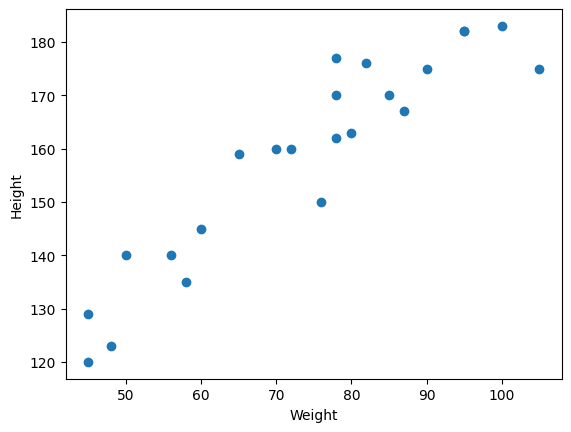

In [182]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [183]:
## Correlation between Height and Weight
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


>Result: Correlation = 0.93 → Highly positively correlated

>Linear correlation → Linear regression will work well!

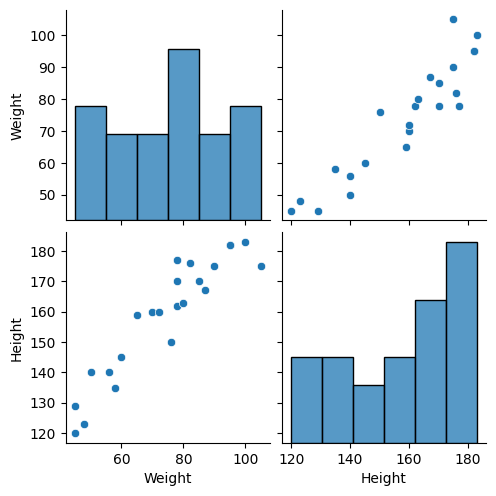

In [184]:
## Seaborn for visualization of the relationship between Height and Weight
import seaborn as sns
sns.pairplot(df)

In [185]:
## Independent and dependent features
X=df[['Weight']] ### independent features should be data frame or 2 dimesnionalarray
y=df['Height'] ## this variiable can be in series or 1d array
X.head()


,Weight
0,45
1,58
2,48
3,60
4,70




<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;">
<b>Question:</b> Why we use double brackets for X?
</div>


>Because X is a dataframe, we need to use double brackets to select the column Height.
If we use single bracket, we will get a series, which is not what we want.

In [186]:
X_series=df['Weight']
np.array(X_series).shape

(23,)

In [187]:
np.array(y).shape

(23,)

In [188]:
## Train Test Split
from sklearn.model_selection import train_test_split


In [189]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;">
<b>Note:</b> Random State :
</div>


>random_state=42: Ensures same split every time you run.
Without it → Different random splits each time

In [190]:
X_train.shape

(17, 1)

In [191]:
## Standardization
from sklearn.preprocessing import StandardScaler

<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;"> 
<b>Note:</b> Why Standardization to input features?
</div>


>• Different features have different units (kg, cm, etc.)

>• Large values → Takes longer to reach global minima

>• Standardization brings all to same scale

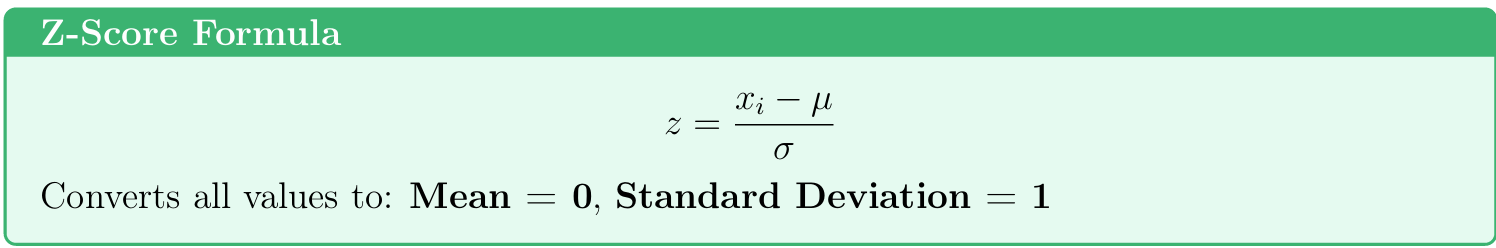

In [192]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [193]:
X_test=scaler.transform(X_test)

<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;"> 
<b>Note:</b> 
fit_transform() VS transform() - Data Leakage!
</div>


>fit_transform() - Learn the mean and std dev from training data.
transform() - Use the learned mean and std dev to transform test data.

><mark>Why we use fit_transform() on training data and transform() on test data?</mark >

      - To avoid data leakage : Model should not know anything about test data!


In [194]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [195]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [196]:
regression=LinearRegression(n_jobs=-1)

<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;"> 
<b>Note:</b> 
What is n_jobs here ?


</div>

>Here 1 means use 1 processor.
Defination of n_jobs:
    Number of jobs to run in parallel.
    None means 1 unless in a joblib.parallel_backend context.
    -1 means using all processors.


In [197]:
regression.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",-1
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [198]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


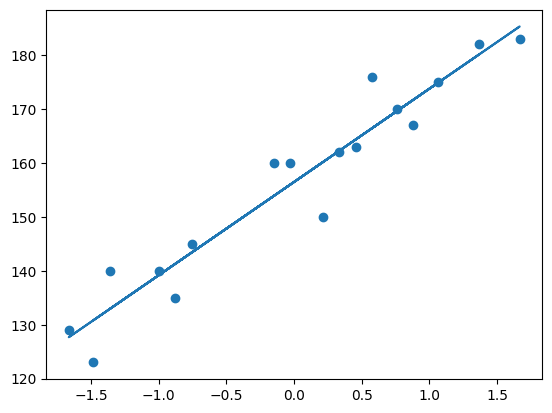

In [199]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =156.470 + 17.29(X_test)

In [200]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [201]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [202]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [203]:
from sklearn.metrics import r2_score

In [204]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [205]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [206]:
## OLS Linear Regression
import statsmodels.api as sm

In [207]:
model=sm.OLS(y_train,X_train).fit()

In [208]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [209]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 20 Dec 2025   Prob (F-statistic):                       0.664
Time:                        17:22:49   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [212]:
regression.predict([[72]])

array([1401.94139895])

In [211]:
## Prediction For new data
regression.predict(scaler.transform([[72]]))

c:\Users\HP\Desktop\Data analyst bootcamp\Python\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;"> 
<b>Note:</b> 
Here if we not use scaler.transform() and simply write regression.predict([[72]]) then we will get different results Why?
</div>

>Because we are missing something to do and that is to standardize the data.

>To standardize the data we have to use scaler.transform() method.

<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;"> 
<b>Note:</b> 
TO Learn more and Grasp the Concept of Linear Regression, Check out the following link:

</div>


>https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html